# Modelling and Evaluation 

## Objectives

The primary objective of this notebook is to achieve the Second Business Requirement, which involves the following steps:

1. Engineer features for modelling.
2. Perform data classification to distinguish between healthy Cherry leaves and those infected with powdery mildew.

## Inputs

The data for this project is organized as follows:

1. Training data: `inputs/cherry_leaves_dataset/train` - This directory contains images of cherry leaves for training the model.
2. Test data: `inputs/cherry_leaves_dataset/test` - This directory contains images used to evaluate the model's performance.
3. Validation data: `inputs/cherry_leaves_dataset/validate` - This directory contains images for validating the model during training.
4. Embedded image shapes - This refers to the dimensions of the images in the dataset.

## Outputs

The following outputs will be generated in this notebook:

1. Images distribution plot - Plots depicting the distribution of images in the train, validation, and test sets.
2. Image augmentation - Applying data augmentation techniques to increase the diversity of the training data and improve model generalization.
3. Class indices for prediction inference - Changing prediction inference to human-readable labels for better understanding.
4. Machine learning model creation and training - Building and training a model to classify cherry leaves into healthy or infected with powdery mildew.
5. Save model - Saving the trained model for future use.
6. Learning curve plot - Plotting the model's performance on the training and validation data over multiple epochs.
7. Model evaluation on pickle file - Evaluating the trained model's performance and saving the evaluation results in a pickle file.
8. Prediction on a random image file - Using the trained model to make predictions on a randomly chosen image file.



## Import packages and change working directory

#### Import packages 

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

#### Set working directory

##### Set parent of the working directory to the new current directory

In [2]:
work_dir = os.getcwd()
work_dir

'/workspaces/PP5-mildew-detection-in-cherry-leaves/jupyter_notebooks'

In [3]:
os.chdir(os.path.dirname(work_dir))
print("You set a new current directory")

You set a new current directory


##### Confirm the new current directory

In [4]:
current_dir = os.getcwd()
current_dir

'/workspaces/PP5-mildew-detection-in-cherry-leaves'

#### Set input directories

In [5]:
my_data_dir = 'inputs/cherry_leaves_dataset/cherry-leaves'
train_path = my_data_dir + '/train'
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'
my_data_dir

'inputs/cherry_leaves_dataset/cherry-leaves'

#### Set output directories

In [6]:
version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(current_dir) and version in os.listdir(current_dir + '/outputs'):
    print('Old version is already available create a new version.')
    pass
else:
    os.makedirs(name=file_path)

Old version is already available create a new version.


##### Set label names

In [7]:
labels = os.listdir(train_path)
print('Label for the images are', labels)

Label for the images are ['powdery_mildew', 'healthy']


---

### Set image shape

In [8]:
import joblib
version = 'v1'
image_shape = joblib.load(filename=f"outputs/{version}/image_shape.pkl")
image_shape

(256, 256, 3)

### Number of images in train, test and validation datasets

* train - powdery_mildew: 1472 images
* train - healthy: 1472 images
* validation - powdery_mildew: 210 images
* validation - healthy: 210 images
* test - powdery_mildew: 422 images
* test - healthy: 422 images




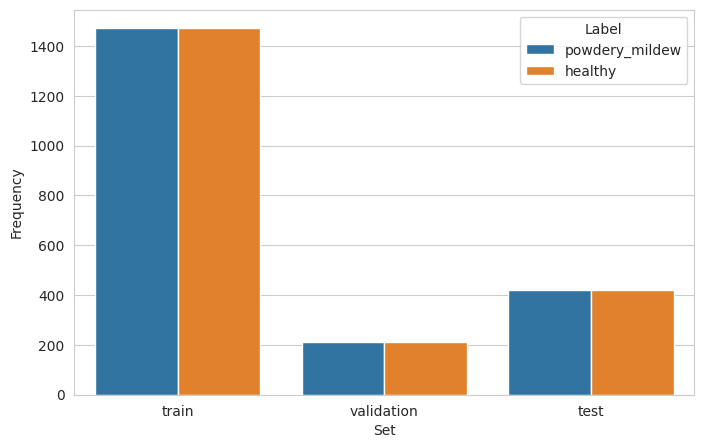

In [9]:
df_freq = pd.DataFrame([]) 
for folder in ['train', 'validation', 'test']:
  for label in labels:
    df_freq = df_freq.append(
        pd.Series(data={'Set': folder,
                        'Label': label,
                        'Frequency':int(len(os.listdir(my_data_dir+'/'+ folder + '/' + label)))}
                  ),
                  ignore_index=True
        )
    
    print(f"* {folder} - {label}: {len(os.listdir(my_data_dir+'/'+ folder + '/' + label))} images")

print("\n")
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
sns.barplot(data=df_freq, x='Set', y='Frequency', hue='Label')
plt.savefig(f'{file_path}/labels_distribution.png', bbox_inches='tight', dpi=150)
plt.show()

## Image data Augmentation 

### Image data generator

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
augmented_image_data = ImageDataGenerator(rotation_range=20,
                                          width_shift_range=0.10,
                                          height_shift_range=0.10,
                                          shear_range=0.1,
                                          zoom_range=0.1,
                                          horizontal_flip=True,
                                          vertical_flip=True,
                                          fill_mode='nearest',
                                          rescale=1./255
                                          )

### Augment training, validation and test image dataset

- #### Training

In [12]:
batch_size = 20  # Set batch size
train_set = augmented_image_data.flow_from_directory(train_path,
                                                     target_size=image_shape[:2],
                                                     color_mode='rgb',
                                                     batch_size=batch_size,
                                                     class_mode='binary',
                                                     shuffle=True
                                                     )

train_set.class_indices

Found 2944 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

- #### Validation

In [13]:
validation_set = ImageDataGenerator(rescale=1./255).flow_from_directory(val_path,
                                                                        target_size=image_shape[:2],
                                                                        color_mode='rgb',
                                                                        batch_size=batch_size,
                                                                        class_mode='binary',
                                                                        shuffle=False
                                                                        )

validation_set.class_indices

Found 420 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

- #### Test

In [14]:
test_set = ImageDataGenerator(rescale=1./255).flow_from_directory(test_path,
                                                                  target_size=image_shape[:2],
                                                                  color_mode='rgb',
                                                                  batch_size=batch_size,
                                                                  class_mode='binary',
                                                                  shuffle=False
                                                                  )

test_set.class_indices

Found 844 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

### Plot augmented images

- #### Training

(20, 256, 256, 3)


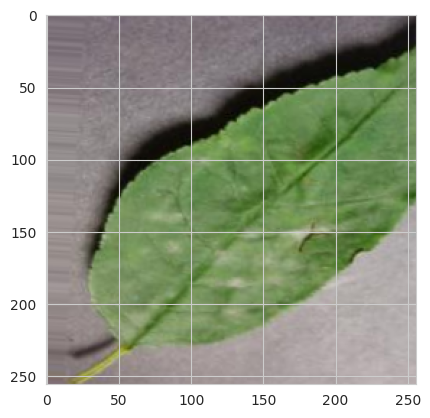

(20, 256, 256, 3)


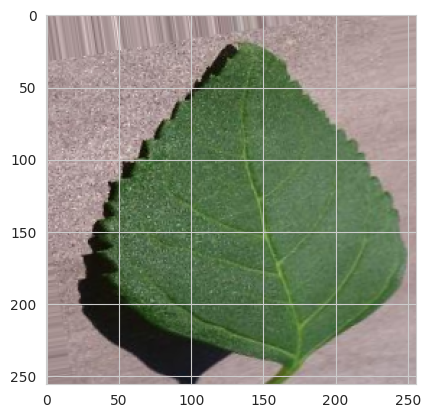

(20, 256, 256, 3)


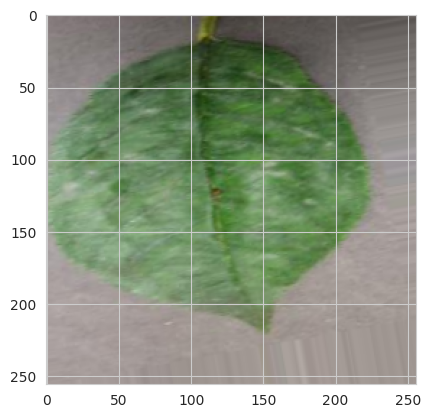

In [15]:
for _ in range(3):
    img, label = train_set.next()
    print(img.shape)  # (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

- #### Validation

(20, 256, 256, 3)


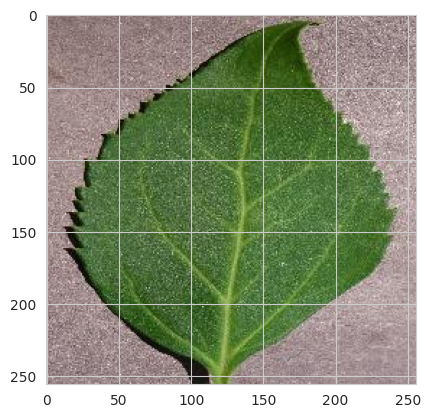

(20, 256, 256, 3)


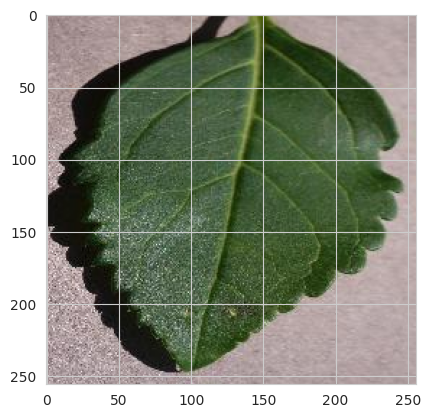

(20, 256, 256, 3)


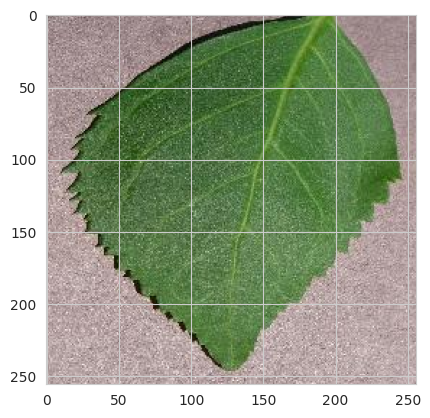

In [16]:
for _ in range(3):
    img, label = validation_set.next()
    print(img.shape)  # (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

- #### Test

(20, 256, 256, 3)


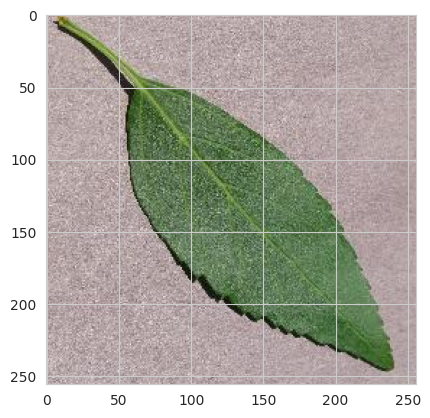

(20, 256, 256, 3)


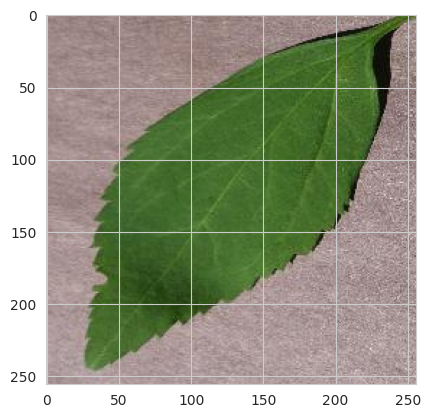

(20, 256, 256, 3)


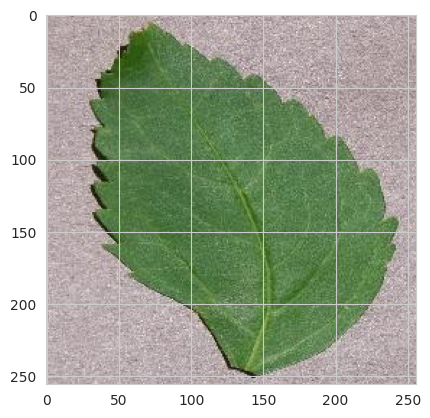

In [17]:
for _ in range(3):
    img, label = test_set.next()
    print(img.shape)  # (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

#### Save class_indices

In [18]:
joblib.dump(value=train_set.class_indices,
            filename=f"{file_path}/class_indices.pkl")

['outputs/v1/class_indices.pkl']

## Model Creation 

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

In [20]:
def create_model():
    model = Sequential()

    model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=image_shape, activation='relu', ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=16, kernel_size=(3, 3), input_shape=image_shape, activation='relu', ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=8, kernel_size=(3, 3), input_shape=image_shape, activation='relu', ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))

    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model

##### Model Summary

In [21]:
create_model().summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 16)      4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 7200)              0

#### Early stopping 

In [22]:
early_stop = EarlyStopping(monitor='val_loss', patience=3)

#### Fit for model training

In [23]:
model = create_model()
model.fit(train_set,
          epochs=25,
          steps_per_epoch=len(train_set.classes) // batch_size,
          validation_data=validation_set,
          callbacks=[early_stop],
          verbose=1
          )

2023-07-27 19:56:36.062860: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/25
147/147 [==============================] - 231s 1s/step - loss: 0.2593 - accuracy: 0.8796 - val_loss: 0.0117 - val_accuracy: 1.0000
Epoch 2/25
147/147 [==============================] - 203s 1s/step - loss: 0.0757 - accuracy: 0.9771 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 3/25
147/147 [==============================] - 199s 1s/step - loss: 0.0578 - accuracy: 0.9812 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 4/25
147/147 [==============================] - 198s 1s/step - loss: 0.0329 - accuracy: 0.9884 - val_loss: 0.0050 - val_accuracy: 0.9976
Epoch 5/25
147/147 [==============================] - 206s 1s/step - loss: 0.0425 - accuracy: 0.9867 - val_loss: 0.0161 - val_accuracy: 0.9952
Epoch 6/25
147/147 [==============================] - 210s 1s/step - loss: 0.0297 - accuracy: 0.9915 - val_loss: 0.0095 - val_accuracy: 0.9952


#### Save model

In [24]:
model.save('outputs/v1/mildew_detector_model.h5')

---

## Model Performance 

### Model Learning Curve 

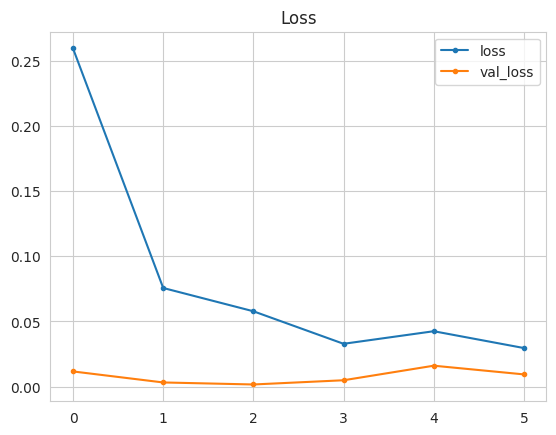

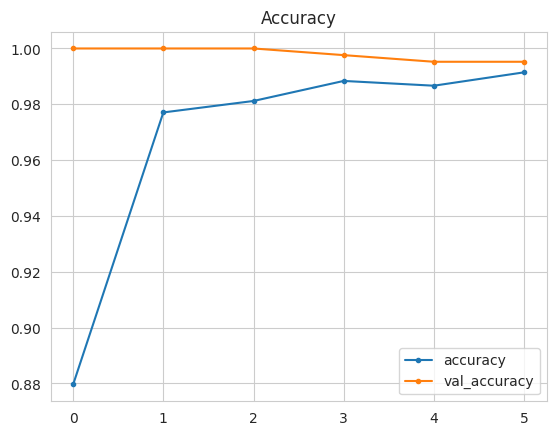

In [25]:
losses = pd.DataFrame(model.history.history)

sns.set_style("whitegrid")
losses[['loss', 'val_loss']].plot(style='.-')
plt.title("Loss")
plt.savefig(f'{file_path}/model_training_losses.png', bbox_inches='tight', dpi=150)
plt.show()

print("\n")
losses[['accuracy', 'val_accuracy']].plot(style='.-')
plt.title("Accuracy")
plt.savefig(f'{file_path}/model_training_acc.png', bbox_inches='tight', dpi=150)
plt.show()

### Model Evaluation 

#### Load saved model

In [26]:
from keras.models import load_model
model = load_model('outputs/v1/mildew_detector_model.h5')

#### Evaluate Model on test set

In [27]:
evaluation = model.evaluate(test_set)

43/43 [==============================] - 14s 318ms/step - loss: 0.0054 - accuracy: 0.9988


#### Save evaluation pickle

In [28]:
joblib.dump(value=evaluation, filename=f"outputs/v1/evaluation.pkl")

['outputs/v1/evaluation.pkl']

---

### Create a prediction based on new data input

#### Load Image as PIL

Image shape: (256, 256), Image mode: RGB


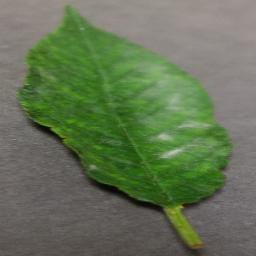

In [29]:
from tensorflow.keras.preprocessing import image

pointer = 66
label = labels[0]  # select Uninfected or Parasitised

pil_image = image.load_img(test_path + '/' + label + '/' + os.listdir(test_path+'/' + label)[pointer],
                           target_size=image_shape, color_mode='rgb')
print(f'Image shape: {pil_image.size}, Image mode: {pil_image.mode}')
pil_image

#### Convert image to array

In [30]:
my_image = image.img_to_array(pil_image)
my_image = np.expand_dims(my_image, axis=0)/255
print(my_image.shape)

(1, 256, 256, 3)


#### Class probability predictions

In [31]:
pred_proba = model.predict(my_image)[0, 0]

target_map = {v: k for k, v in train_set.class_indices.items()}
pred_class = target_map[pred_proba > 0.5]

if pred_class == target_map[0]: pred_proba = 1 - pred_proba

print(pred_proba)
print(pred_class)

0.9996754
powdery_mildew


---

### Add, commit and push to github

In [32]:
! git add .

In [33]:
! git commit -m "create and evaluate a model which predicts a healthy or infected leaf"

[main 4394dc0] create and evaluate a model which predicts a healthy or infected leaf
 11 files changed, 2313 insertions(+), 9 deletions(-)
 create mode 100644 jupyter_notebooks/.ipynb_checkpoints/Modelling_and_Evaluation-checkpoint.ipynb
 create mode 100644 jupyter_notebooks/.ipynb_checkpoints/Untitled-checkpoint.ipynb
 create mode 100644 jupyter_notebooks/Modelling_and_Evaluation.ipynb
 create mode 100644 jupyter_notebooks/Untitled.ipynb
 create mode 100644 outputs/v1/class_indices.pkl
 create mode 100644 outputs/v1/evaluation.pkl
 create mode 100644 outputs/v1/labels_distribution.png
 create mode 100644 outputs/v1/mildew_detector_model.h5
 create mode 100644 outputs/v1/model_training_acc.png
 create mode 100644 outputs/v1/model_training_losses.png


In [34]:
! git push

Enumerating objects: 21, done.
Counting objects: 100% (21/21), done.
Delta compression using up to 4 threads
Compressing objects: 100% (12/12), done.
Writing objects: 100% (15/15), 15.36 MiB | 8.81 MiB/s, done.
Total 15 (delta 2), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/23052015/PP5-mildew-detection-in-cherry-leaves
   bb8d3d5..4394dc0  main -> main
